
# 岭系数对回归系数的影响

>翻译者:[@Loopy](https://github.com/loopyme)        
>校验者:[@barrycg](https://github.com/barrycg)

本实例展示了回归模型系数间的共线性。

`岭回归` 是本例中使用的预测模型。每种颜色都分别表示不同特征下的回归系数向量，岭系数alpha是正则化项的参数。下图表示了岭系数作为变量参数,回归系数在岭回归模型中的变化。

这个例子还显示了将岭回归应用于高病态矩阵的有效性。在高病态矩阵中，一些变量的微小变化会导致计算权重(回归系数)的巨大差异。在这种情况下，设置一个确定的正则化项(alpha)可以减少这种不良差异(噪声)。

当alpha很大时，正则化项是平方损失函数的主要影响因子，回归系数的影响趋于零。在路径的末端，当alpha趋近零时,损失函数会慢慢变成普通最小二乘，回归系数表现出较大的波动。在实践中，有必要对alpha进行调优，以便在两者之间保持平衡。



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# X 是10x10的希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [ ]:
# 计算不同岭系数时的回归系数
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [ ]:
#绘图
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('岭系数alpha')
plt.ylabel('回归系数coef_')
plt.title('岭系数对回归系数的影响')
plt.axis('tight')
plt.show()

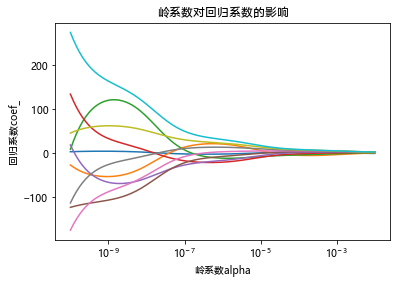